In [17]:
import gensim
from gensim.models import Word2Vec
import numpy as np
import logging

# Enable logging to see training progress
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',level=logging.INFO)

# Sample sentences about various topics
corpus = """
Natural language processing is a fascinating field of artificial
intelligence.
Machine learning algorithms can learn patterns from data automatically.
Deep learning uses neural networks with multiple layers.
Word embeddings capture semantic relationships between words.
The quick brown fox jumps over the lazy dog.
Artificial intelligence is transforming many industries today.
Neural networks are inspired by biological neurons in the brain.
Data science combines statistics programming and domain knowledge.
Python is a popular programming language for machine learning.
Text classification is an important task in natural language processing.
Sentiment analysis determines the emotional tone of text.
Supervised learning requires labeled training data.
Unsupervised learning discovers hidden patterns in data.
Transfer learning allows reusing knowledge from one task to another.
Large language models are trained on massive text corpora.
""" * 20 # Repeat for more training data

from gensim.utils import simple_preprocess
def preprocess_corpus(text):
 """
 Split text into sentences and tokenize each sentence.
 Returns list of lists: [[word1, word2, ...], [word1, word2, ...], ...]
 """
 sentences = text.strip().split('.')
 tokenized_sentences = []

 for sentence in sentences:
 # simple_preprocess lowercases and tokenizes
    tokens = simple_preprocess(sentence, deacc=True) # deacc=True removes accents
    if len(tokens) > 2: # Keep sentences with at least 3 words
        tokenized_sentences.append(tokens)

 return tokenized_sentences

sentences = preprocess_corpus(corpus)
print(f"Number of sentences: {len(sentences)}")
print(f"Example sentence: {sentences[0]}")


Number of sentences: 300
Example sentence: ['natural', 'language', 'processing', 'is', 'fascinating', 'field', 'of', 'artificial', 'intelligence']


In [18]:
#Step 2: Train Skip-Gram Model
# Train Skip-Gram model

sg_model = Word2Vec(
 sentences=sentences,
 vector_size=100, # Dimensionality of embeddings
 window=5, # Context window size
 min_count=2, # Ignore words appearing less than 2 times
 sg=1, # 1 = Skip-Gram, 0 = CBOW
 workers=4, # Number of CPU cores for parallel training
 epochs=10, # Number of training iterations
 negative=5, # Number of negative samples
 seed=42
)
print(f"Skip-Gram model trained!")
print(f"Vocabulary size: {len(sg_model.wv)}")

2026-02-25 17:36:46,893 : INFO : collecting all words and their counts
2026-02-25 17:36:46,894 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2026-02-25 17:36:46,896 : INFO : collected 90 word types from a corpus of 2500 raw words and 300 sentences
2026-02-25 17:36:46,897 : INFO : Creating a fresh vocabulary
2026-02-25 17:36:46,898 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=2 retains 90 unique words (100.00% of original 90, drops 0)', 'datetime': '2026-02-25T17:36:46.898372', 'gensim': '4.4.0', 'python': '3.12.0 (tags/v3.12.0:0fb18b0, Oct  2 2023, 13:03:39) [MSC v.1935 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26200-SP0', 'event': 'prepare_vocab'}
2026-02-25 17:36:46,899 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=2 leaves 2500 word corpus (100.00% of original 2500, drops 0)', 'datetime': '2026-02-25T17:36:46.899370', 'gensim': '4.4.0', 'python': '3.12.0 (tags/v3.12.0:0fb18b0, Oct  2 2023, 13:03:39) [MSC v.1935 64 

Skip-Gram model trained!
Vocabulary size: 90


In [19]:
# Step 3: Train CBOW Model

# Train CBOW model
cbow_model = Word2Vec(
 sentences=sentences,
 vector_size=100,
 window=5,
 min_count=2,
 sg=0, # 0 = CBOW
 workers=4,
 epochs=10,
 negative=5,
 seed=42
)
print(f"CBOW model trained!")
print(f"Vocabulary size: {len(cbow_model.wv)}")


2026-02-25 17:36:46,997 : INFO : collecting all words and their counts
2026-02-25 17:36:46,998 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2026-02-25 17:36:46,999 : INFO : collected 90 word types from a corpus of 2500 raw words and 300 sentences
2026-02-25 17:36:46,999 : INFO : Creating a fresh vocabulary
2026-02-25 17:36:47,002 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=2 retains 90 unique words (100.00% of original 90, drops 0)', 'datetime': '2026-02-25T17:36:47.002596', 'gensim': '4.4.0', 'python': '3.12.0 (tags/v3.12.0:0fb18b0, Oct  2 2023, 13:03:39) [MSC v.1935 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26200-SP0', 'event': 'prepare_vocab'}
2026-02-25 17:36:47,004 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=2 leaves 2500 word corpus (100.00% of original 2500, drops 0)', 'datetime': '2026-02-25T17:36:47.004595', 'gensim': '4.4.0', 'python': '3.12.0 (tags/v3.12.0:0fb18b0, Oct  2 2023, 13:03:39) [MSC v.1935 64 

CBOW model trained!
Vocabulary size: 90


In [20]:
# Step 4: Exploring the Trained Models

# Access a word vector
word = 'learning'
if word in sg_model.wv:
 vector = sg_model.wv[word]
 print(f"\nVector for '{word}' (first 10 dimensions):")
 print(vector[:10])
 print(f"Vector shape: {vector.shape}")


Vector for 'learning' (first 10 dimensions):
[ 0.05640966  0.07848935  0.00905015  0.10501792 -0.11637773  0.09666732
 -0.11148483  0.21013007 -0.2592984  -0.03735862]
Vector shape: (100,)


In [21]:
# Most similar words using Skip-Gram
print(f"\nWords most similar to 'learning' (Skip-Gram):")
similar_words = sg_model.wv.most_similar('learning', topn=5)
for word, similarity in similar_words:
 print(f" {word}: {similarity:.3f}")
 
# Most similar words using CBOW
print(f"\nWords most similar to 'learning' (CBOW):")
similar_words = cbow_model.wv.most_similar('learning', topn=5)
for word, similarity in similar_words:
 print(f" {word}: {similarity:.3f}")



Words most similar to 'learning' (Skip-Gram):
 data: 0.998
 from: 0.998
 algorithms: 0.997
 knowledge: 0.997
 task: 0.997

Words most similar to 'learning' (CBOW):
 the: 0.989
 is: 0.987
 task: 0.987
 data: 0.987
 knowledge: 0.986


In [22]:
# Step 5: Compute Word Similarity
from scipy.spatial.distance import cosine
def compute_similarity(model, word1, word2):
 """
 Compute cosine similarity between two words.
 """
 if word1 in model.wv and word2 in model.wv:
    # Gensim provides built-in similarity
    sim = model.wv.similarity(word1, word2)
    return sim
 else:
    return None

# Test similarity
word_pairs = [
 ('machine', 'learning'),
 ('neural', 'networks'),
 ('dog', 'learning'),
 ('language', 'processing'),
 ('artificial', 'intelligence')
]
print("\nWord Pair Similarities (Skip-Gram):")
print("-" * 50)
for w1, w2 in word_pairs:
 sim = compute_similarity(sg_model, w1, w2)
 if sim is not None:
    print(f"{w1:15} <-> {w2:15} : {sim:.3f}")




Word Pair Similarities (Skip-Gram):
--------------------------------------------------
machine         <-> learning        : 0.997
neural          <-> networks        : 0.997
dog             <-> learning        : 0.996
language        <-> processing      : 0.996
artificial      <-> intelligence    : 0.997


In [23]:
# Step 6: Save and Load Model

# Save models
sg_model.save("word2vec_skipgram.model")
cbow_model.save("word2vec_cbow.model")
print("\nModels saved!")

# Load model
loaded_model = Word2Vec.load("word2vec_skipgram.model")
print(f"Model loaded! Vocabulary size: {len(loaded_model.wv)}")

# Save only word vectors (smaller file size)
sg_model.wv.save_word2vec_format("word2vec_vectors.txt", binary=False)
print("Word vectors saved in text format!")



2026-02-25 17:36:47,139 : INFO : Word2Vec lifecycle event {'fname_or_handle': 'word2vec_skipgram.model', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2026-02-25T17:36:47.139433', 'gensim': '4.4.0', 'python': '3.12.0 (tags/v3.12.0:0fb18b0, Oct  2 2023, 13:03:39) [MSC v.1935 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26200-SP0', 'event': 'saving'}
2026-02-25 17:36:47,140 : INFO : not storing attribute cum_table
2026-02-25 17:36:47,143 : INFO : saved word2vec_skipgram.model
2026-02-25 17:36:47,144 : INFO : Word2Vec lifecycle event {'fname_or_handle': 'word2vec_cbow.model', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2026-02-25T17:36:47.144905', 'gensim': '4.4.0', 'python': '3.12.0 (tags/v3.12.0:0fb18b0, Oct  2 2023, 13:03:39) [MSC v.1935 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26200-SP0', 'event': 'saving'}
2026-02-25 17:36:47,146 : INFO : not storing attribute cum_table
2026-02-25 17:36:47,148 : INFO : sa


Models saved!


2026-02-25 17:36:47,173 : INFO : setting ignored attribute cum_table to None
2026-02-25 17:36:47,175 : INFO : Word2Vec lifecycle event {'fname': 'word2vec_skipgram.model', 'datetime': '2026-02-25T17:36:47.175412', 'gensim': '4.4.0', 'python': '3.12.0 (tags/v3.12.0:0fb18b0, Oct  2 2023, 13:03:39) [MSC v.1935 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26200-SP0', 'event': 'loaded'}
2026-02-25 17:36:47,176 : INFO : storing 90x100 projection weights into word2vec_vectors.txt


Model loaded! Vocabulary size: 90
Word vectors saved in text format!


In [24]:
# Part 2: Working with Pre-trained GloVe Embeddings (15 minutes)
# Step 1: Download GloVe Embeddings

# For this lab, we'll use gensim's downloader to get pre-trained embeddings
import gensim.downloader as api
print("Available pre-trained models:")
print(list(api.info()['models'].keys())[:10])
# Download GloVe embeddings (this may take a few minutes the first time)
print("\nDownloading GloVe embeddings...")
glove_model = api.load("glove-wiki-gigaword-100") # 100-dimensional GloVe vectors
print(f"GloVe model loaded! Vocabulary size: {len(glove_model)}")

Available pre-trained models:


2026-02-25 17:36:47,542 : INFO : loading projection weights from C:\Users\prosi/gensim-data\glove-wiki-gigaword-100\glove-wiki-gigaword-100.gz


['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50']



2026-02-25 17:37:27,411 : INFO : KeyedVectors lifecycle event {'msg': 'loaded (400000, 100) matrix of type float32 from C:\\Users\\prosi/gensim-data\\glove-wiki-gigaword-100\\glove-wiki-gigaword-100.gz', 'binary': False, 'encoding': 'utf8', 'datetime': '2026-02-25T17:37:27.411338', 'gensim': '4.4.0', 'python': '3.12.0 (tags/v3.12.0:0fb18b0, Oct  2 2023, 13:03:39) [MSC v.1935 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26200-SP0', 'event': 'load_word2vec_format'}


GloVe model loaded! Vocabulary size: 400000


In [25]:
# Step 2: Explore GloVe Embeddings
# Access GloVe word vector

word = 'computer'
vector = glove_model[word]
print(f"\nGloVe vector for '{word}' (first 10 dimensions):")
print(vector[:10])

# Find similar words
print(f"\nWords most similar to '{word}' (GloVe):")
similar = glove_model.most_similar(word, topn=8)
for w, sim in similar:
 print(f" {w:20} : {sim:.3f}")



GloVe vector for 'computer' (first 10 dimensions):
[-0.16298   0.30141   0.57978   0.066548  0.45835  -0.15329   0.43258
 -0.89215   0.57747   0.36375 ]

Words most similar to 'computer' (GloVe):
 computers            : 0.875
 software             : 0.837
 technology           : 0.764
 pc                   : 0.737
 hardware             : 0.729
 internet             : 0.729
 desktop              : 0.723
 electronic           : 0.722


In [26]:
# Step 3: Analogies with GloVe

def solve_analogy(model, a, b, c, topn=5):
 """
 Solve analogy: a is to b as c is to ?
 Example: king is to man as queen is to woman
 Formula: vec(b) - vec(a) + vec(c) ≈ vec(d)
 """
 try:
    # Gensim provides built-in analogy solving
    # positive=[b, c] means we add these vectors
    # negative=[a] means we subtract this vector
    result = model.most_similar(positive=[b, c], negative=[a],topn=topn)
    return result
 except KeyError as e:
    print(f"Word not in vocabulary: {e}")
    return []

# Test various analogies
analogies = [
 ('man', 'woman', 'king'), # king:man :: queen:woman
 ('paris', 'france', 'tokyo'), # tokyo:japan :: paris:france
 ('slow', 'slower', 'fast'), # fast:faster :: slow:slower
 ('good', 'better', 'bad'), # bad:worse :: good:better
]
print("\nSolving Analogies with GloVe:")
print("=" * 70)
for a, b, c in analogies:
 print(f"\n{a} : {b} :: {c} : ?")
 results = solve_analogy(glove_model, a, b, c, topn=3)
 if results:
    for word, score in results:
        print(f" → {word:15} (score: {score:.3f})")



Solving Analogies with GloVe:

man : woman :: king : ?
 → queen           (score: 0.770)
 → monarch         (score: 0.684)
 → throne          (score: 0.676)

paris : france :: tokyo : ?
 → japan           (score: 0.886)
 → korea           (score: 0.724)
 → japanese        (score: 0.691)

slow : slower :: fast : ?
 → faster          (score: 0.799)
 → quicker         (score: 0.666)
 → pace            (score: 0.655)

good : better :: bad : ?
 → worse           (score: 0.844)
 → too             (score: 0.749)
 → even            (score: 0.731)


In [27]:
# Part 3: Evaluation Methods (20 minutes)
# Intrinsic Evaluation: Word Similarity

from scipy.stats import spearmanr
# Simulate a word similarity dataset
# Format: (word1, word2, human_similarity_score)
similarity_dataset = [
 ('computer', 'keyboard', 7.5),
 ('computer', 'internet', 7.2),
 ('computer', 'book', 3.1),
 ('student', 'teacher', 6.4),
 ('student', 'school', 7.8),
 ('doctor', 'hospital', 8.2),
 ('doctor', 'nurse', 7.9),
 ('car', 'automobile', 9.2),
 ('car', 'bicycle', 6.3),
 ('movie', 'film', 9.5),
]
def evaluate_similarity(model, dataset):
 """
 Compute correlation between model similarities and human judgments.
 """
 model_scores = []
 human_scores = []

 for word1, word2, human_score in dataset:
    try:
        model_score = model.similarity(word1, word2)
        model_scores.append(model_score)
        human_scores.append(human_score)
    except KeyError:
 # Skip pairs with OOV words
        continue

 # Compute Spearman correlation
 correlation, p_value = spearmanr(model_scores, human_scores)
 return correlation, p_value, len(model_scores)

# Evaluate GloVe
corr, pval, n = evaluate_similarity(glove_model, similarity_dataset)
print(f"\nGloVe Similarity Evaluation:")
print(f" Spearman correlation: {corr:.3f}")
print(f" P-value: {pval:.4f}")
print(f" Pairs evaluated: {n}/{len(similarity_dataset)}")


GloVe Similarity Evaluation:
 Spearman correlation: 0.382
 P-value: 0.2763
 Pairs evaluated: 10/10


In [28]:
# Intrinsic Evaluation: Analogy Task

# Simple analogy test set
analogy_test = [
 # Semantic analogies
 ('man', 'woman', 'king', 'queen'),
 ('man', 'woman', 'boy', 'girl'),
 ('paris', 'france', 'berlin', 'germany'),
 ('paris', 'france', 'rome', 'italy'),
 
 # Syntactic analogies
 ('good', 'better', 'bad', 'worse'),
 ('good', 'better', 'long', 'longer'),
 ('walk', 'walking', 'swim', 'swimming'),
 ('walk', 'walked', 'play', 'played'),
]
def evaluate_analogies(model, test_set):
 """
 Evaluate model on analogy task.
 Returns accuracy.
 """
 correct = 0
 total = 0

 for a, b, c, expected in test_set:
    try:
        # Get top prediction
        predictions = model.most_similar(positive=[b, c], negative=[a], topn=1)
        predicted_word = predictions[0][0]

        total += 1
        if predicted_word == expected:
            correct += 1
            print(f"✓ {a}:{b} :: {c}:{expected} → {predicted_word}")
        else:
            print(f"✗ {a}:{b} :: {c}:{expected} → {predicted_word}")

    except KeyError as e:
        print(f" Skipped (OOV): {a}:{b} :: {c}:{expected}")

 accuracy = correct / total if total > 0 else 0
 return accuracy, correct, total

print("\nAnalogy Evaluation (GloVe):")
print("=" * 70)
acc, correct, total = evaluate_analogies(glove_model, analogy_test)
print(f"\nAccuracy: {correct}/{total} = {acc:.2%}")



Analogy Evaluation (GloVe):
✓ man:woman :: king:queen → queen
✓ man:woman :: boy:girl → girl
✓ paris:france :: berlin:germany → germany
✓ paris:france :: rome:italy → italy
✓ good:better :: bad:worse → worse
✓ good:better :: long:longer → longer
✓ walk:walking :: swim:swimming → swimming
✓ walk:walked :: play:played → played

Accuracy: 8/8 = 100.00%


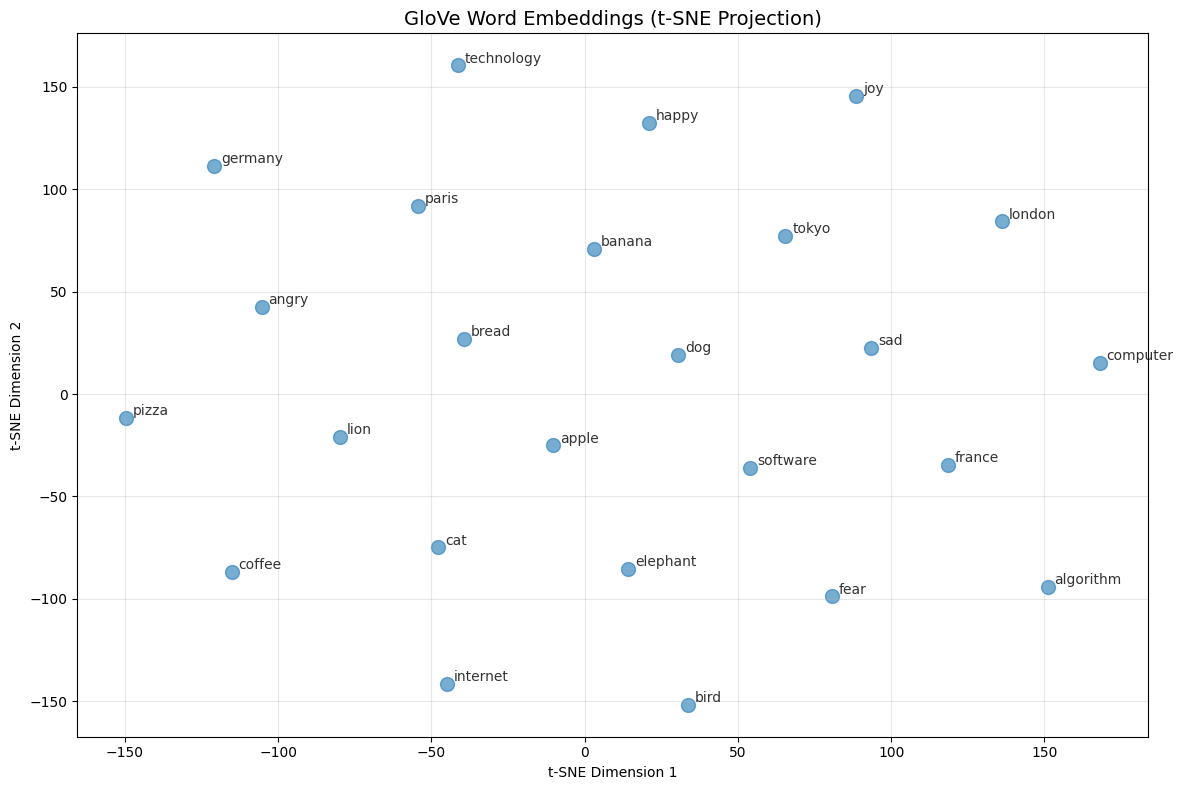

In [30]:
# Part 4: Visualization (15 minutes)
# Step 1: t-SNE Dimensionality Reduction

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
def visualize_embeddings(model, words, title="Word Embeddings"):
 """
 Visualize word embeddings using t-SNE.
 """
 # Get vectors for specified words
 vectors = []
 labels = []

 for word in words:
    if word in model:
        vectors.append(model[word])
        labels.append(word)

 vectors = np.array(vectors)

 # Apply t-SNE
 tsne = TSNE(n_components=2, random_state=42, perplexity=min(30,len(vectors)-1))
 vectors_2d = tsne.fit_transform(vectors)

 # Plot
 plt.figure(figsize=(12, 8))
 plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], alpha=0.6, s=100)

 # Add labels
 for i, label in enumerate(labels):
    plt.annotate(label, xy=(vectors_2d[i, 0], vectors_2d[i, 1]),xytext=(5, 2), textcoords='offset points',fontsize=10, alpha=0.8)
 plt.title(title, fontsize=14)
 plt.xlabel("t-SNE Dimension 1")
 plt.ylabel("t-SNE Dimension 2")
 plt.grid(True, alpha=0.3)
 plt.tight_layout()
 plt.show()

# Select words from different semantic categories

words_to_visualize = [
 # Technology
 'computer', 'software', 'internet', 'technology', 'algorithm',
 # Animals
 'dog', 'cat', 'lion', 'elephant', 'bird',
 # Countries/Cities
 'france', 'germany', 'paris', 'london', 'tokyo',
 # Food
 'apple', 'banana', 'pizza', 'bread', 'coffee',
 # Emotions
 'happy', 'sad', 'angry', 'joy', 'fear',
]
visualize_embeddings(glove_model, words_to_visualize,title="GloVe Word Embeddings (t-SNE Projection)")


In [32]:
# Part 5: Comparison and Practical Applications (5 minutes)
# Compare Word2Vec and GloVe

def compare_models(word, models_dict):
 """
 Compare how different models represent a word.
 """
 print(f"\nComparison for word: '{word}'")
 print("=" * 70)

 for model_name, model in models_dict.items():
    print(f"\n{model_name}:")

    # Check if word exists
    if word in model.wv if hasattr(model, 'wv') else word in model:
        wv = model.wv if hasattr(model, 'wv') else model

        # Get most similar words
        similar = wv.most_similar(word, topn=5)
        print(" Most similar words:")
        for w, score in similar:
           print(f" {w:20} : {score:.3f}")
    else:
        print(f" Word '{word}' not in vocabulary")

# Compare models
models_to_compare = {
 'Skip-Gram (our training)': sg_model,
 'CBOW (our training)': cbow_model,
 'GloVe (pre-trained)': glove_model,
}
compare_models('learning', models_to_compare)
compare_models('intelligence', models_to_compare)



Comparison for word: 'learning'

Skip-Gram (our training):
 Most similar words:
 data                 : 0.998
 from                 : 0.998
 algorithms           : 0.997
 knowledge            : 0.997
 task                 : 0.997

CBOW (our training):
 Most similar words:
 the                  : 0.989
 is                   : 0.987
 task                 : 0.987
 data                 : 0.987
 knowledge            : 0.986

GloVe (pre-trained):
 Most similar words:
 teaching             : 0.772
 knowledge            : 0.761
 experience           : 0.738
 skills               : 0.734
 learn                : 0.734

Comparison for word: 'intelligence'

Skip-Gram (our training):
 Most similar words:
 artificial           : 0.997
 today                : 0.996
 industries           : 0.996
 is                   : 0.996
 learning             : 0.996

CBOW (our training):
 Most similar words:
 learning             : 0.975
 programming          : 0.973
 language             : 0.973
 is            

In [33]:
# Practical Application: Document Similarity

def document_embedding(model, document):
 """
 Compute document embedding as average of word embeddings.
 """
 vectors = []
 words = simple_preprocess(document)

 for word in words:
    if word in model:
        vectors.append(model[word])

 if vectors:
    return np.mean(vectors, axis=0)
 
 else:
    return np.zeros(model.vector_size)

def document_similarity(model, doc1, doc2):
 """
 Compute similarity between two documents.
 """
 vec1 = document_embedding(model, doc1)
 vec2 = document_embedding(model, doc2)

 # Cosine similarity
 similarity = 1 - cosine(vec1, vec2)
 return similarity

# Test documents
docs = [
 "Machine learning is a subset of artificial intelligence.",
 "Deep learning uses neural networks with many layers.",
 "The weather is nice today with clear blue skies.",
]
print("\nDocument Similarity Matrix (using GloVe):")
print("=" * 70)
for i, doc1 in enumerate(docs):
 for j, doc2 in enumerate(docs):
    if i <= j:
        sim = document_similarity(glove_model, doc1, doc2)
        print(f"Doc{i+1} <-> Doc{j+1}: {sim:.3f}")


Document Similarity Matrix (using GloVe):
Doc1 <-> Doc1: 1.000
Doc1 <-> Doc2: 0.869
Doc1 <-> Doc3: 0.745
Doc2 <-> Doc2: 1.000
Doc2 <-> Doc3: 0.726
Doc3 <-> Doc3: 1.000
